# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
data = pd.read_csv("/content/drive/MyDrive/01 Texas Program/03 Advance Machine Learning/Project 3/BankChurners.csv")

## Data Overview

- Observations
- Sanity checks

In [4]:
# Checking the number of rows and columns in the data
data.shape

(10127, 21)

* The dataset has 10127 rows and 21 columns

In [5]:
# let's create a copy of the data
df = data.copy()

In [6]:
# let's view the first 5 rows of the data
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [7]:
# let's view the last 5 rows of the data
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### Checking the data types of the columns for the dataset

In [8]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* 6 variables are object rest all are numerical types.
* All columns have 10127 values, except for columns "Education Level" and "aArital Status".


Lets check the missing values

In [9]:
df.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [10]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

* There are 1519 missing values in the column "Education Level". It represents the 15% of the total data in the column.
* There are 749 missing values in the column "Marital:status". It represents the 7.4% of the total data in the column.

Lets convert the columns with an 'object' datatype into categorical variables

In [11]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.000,1247,2763.000,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,2,2,2,29081.000,1396,27685.000,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.000,2517,19835.000,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.000,1677,9979.000,1.524,1441,32,0.882,0.144


In [12]:
# let's check the data types of the columns in the dataset after the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

### Checking for duplicate values

In [13]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

* There are not duplicate data

**Let's check the number of unique values in each column**

In [14]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

### Statistical summary of the dataset

In [15]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


- Clientnum is a unique ID, hence it is a variable that can be drop
- Customer_Age: The minimum age of the customer is 26 years and the maximum 73. The mean is 46.3
- Dependent_count: Number of dependents varies from 0 to 5. The mean is 2.3
- Months_on_book: The minimum period of relationship with the bank is 13 months and the maximum 56 months.
- Total_Relationship_Count: The minimum number of products held by the customers is 1 and the maximum 6. The mean is 3.8
- Months_Inactive_12_mon: The minimum number of inactive months is 0 and the maximum is 6 months.
- Contacts_Count_12_mon: Similar to the previous, the minimum number of contacts between client and bank is 0 and maximum 6.
- Credit_Limit: The credit limit in the credit cards varies from 1438 to 34516. the mean is 8632
- Total_Revolving_Bal: The balance that carries over from one month to the next varies from 0 to 2517 with a mean of 1162.8
- Avg_Open_To_Buy: The amount left in the card (average of the last 12 months)to use varies from 3 to 34516. The mean is 7469.
- Total_Amt_Chng_Q4_Q1: The ratio of the total transaction amount in 4th quarter and 1st quarter varies from 0 to 3.39. The mean is 0.76
- Total_Trans_Amt: The total transaction amount in the last 12 months varies from 510 to 18484. The mean is 4404.
- Total_Trans_Ct: The total transaction count in the last 12 months varies from 10 to 139. The mean is around 65.
- Total_Ct_Chng_Q4_Q1: The ratio of the transaction count in 4th quarter and 1st quarter varies from 0 to 3.71. The mean is 0.71
- Avg_Utilization_Ratio: The utilization ratio varies from 0 to 0.99. The mean is 0.275



**Data Cleaning**
* Let's drop CLIENTNUM column

In [16]:
df.drop(["CLIENTNUM"], axis=1, inplace=True)

In [17]:
df.describe(include=["category"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [18]:
# list of all categorical variables
cat_col = [
    "Attrition_Flag",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

Existing Customer   0.839
Attrited Customer   0.161
Name: Attrition_Flag, dtype: float64
--------------------------------------------------
F   0.529
M   0.471
Name: Gender, dtype: float64
--------------------------------------------------
Graduate        0.363
High School     0.234
Uneducated      0.173
College         0.118
Post-Graduate   0.060
Doctorate       0.052
Name: Education_Level, dtype: float64
--------------------------------------------------
Married    0.500
Single     0.420
Divorced   0.080
Name: Marital_Status, dtype: float64
--------------------------------------------------
Less than $40K   0.352
$40K - $60K      0.177
$80K - $120K     0.152
$60K - $80K      0.138
abc              0.110
$120K +          0.072
Name: Income_Category, dtype: float64
--------------------------------------------------
Blue       0.932
Silver     0.055
Gold       0.011
Platinum   0.002
Name: Card_Category, dtype: float64
--------------------------------------------------


- 16.1% accounts have been closed (Attrited customer) in the data set. This is the columns that need be analyzed. Categories need to be converted to numbers in order to make the analysis.
- We have more female (52.9%) customers as compared to male customers (47.1%)
- There are 6 categories for education level. 36.3% are graduate, 23.4% are high school, 11.8% are college level, 17.3% are uneducated, 6% are post-graduate, and 5.2% have doctorate.
- 50% of the clients are married, 42% single, and 8% divorce.
- There is a wrong category laveled "abc" in the column "Income Category"
- There are 5 categories in the column "Income_Category". 35.2% of the clients have an income less than 40K, 17.7% between 40K and 60K, 13.8% between 60H and 80K, 15.2% between 80K and 120K, 7.2% more than 120K. And 11% are wrong categorized as "abc"
- There are 4 catgories for the column "Card_Category". 93.2% of the clients are in blue category, 5.5% are Silver Category, 1.1% are gold category, and 0.2% are platinum category.

**Let's encode "Attrition_Flag" column**

In [19]:
df["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
df["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

In [20]:
df["Attrition_Flag"] = pd.to_numeric(df["Attrition_Flag"])

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [21]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [23]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [24]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [25]:
def outliers(data, feature):
  Q1 = data[feature].quantile(0.25)  # To find the 25th percentile
  Q3 = data[feature].quantile(0.75)  # To find the 75th percentile

  IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
  lower = (Q1 - 1.5 * IQR)
  upper = (Q3 + 1.5 * IQR)
  print("lower ",lower)
  print("upper ",upper)

### Univariate analysis

### Observations on Attrition Flag (Category)

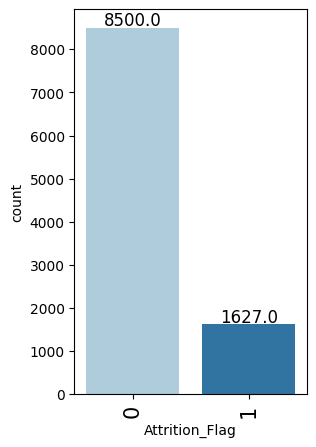

In [26]:
labeled_barplot(df, "Attrition_Flag")

* 16% of the customers closed their accounts.
* This variable is the target value

### Observations on Gender (Category)

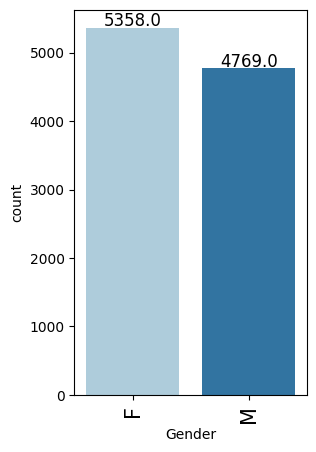

In [27]:
labeled_barplot(df, "Gender")

- We have more female (52.9%) customers as compared to male customers (47.1%)



### Observations on Education_Level (Category)

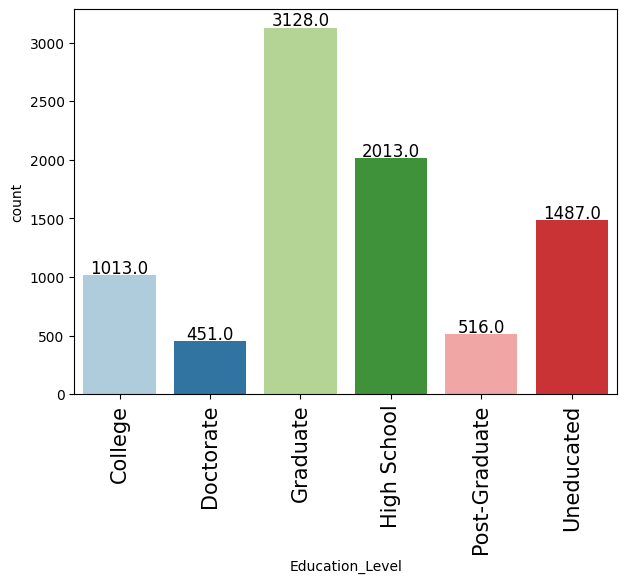

In [28]:
labeled_barplot(df, "Education_Level")

* There are 6 categories for education level. 36.3% are graduate, 23.4% are high school, 17.3% are uneducated, 11.8% are college level, 6% are post-graduate, and 5.2% have doctorate.

### Observations on Marital_Status (Category)

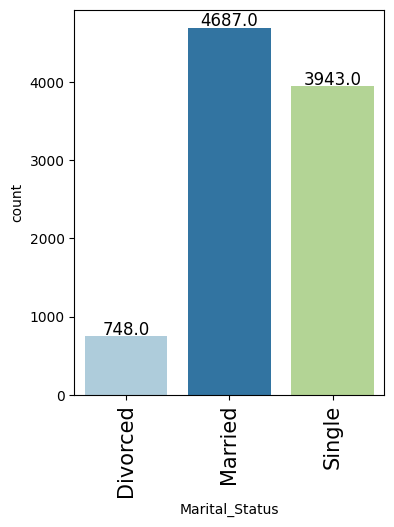

In [29]:
labeled_barplot(df, "Marital_Status")

- 50% of the clients are married, 42% single, and 8% divorce.

### Observations on Income_Category (Category)


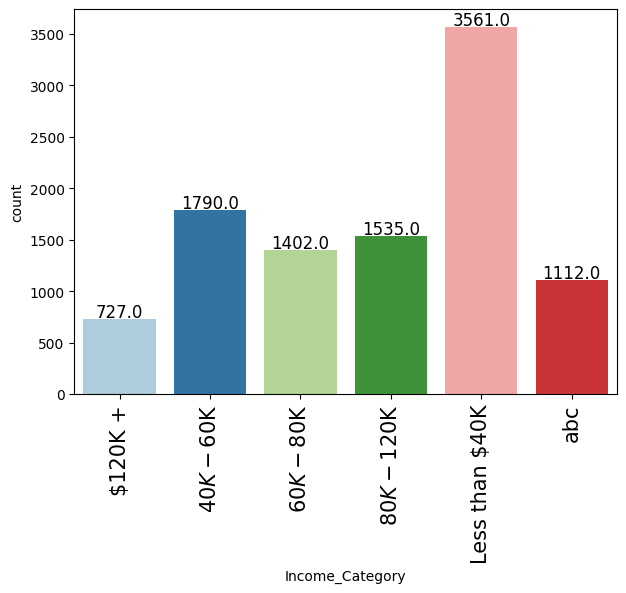

In [30]:
labeled_barplot(df, "Income_Category")

- There is a wrong category laveled "abc".
- There are 5 categories in the column "Income_Category". 35.2% of the clients have an income less than 40K, 17.7% between 40K and 60K, 13.8% between 60H and 80K, 15.2% between 80K and 120K, 7.2% more than 120K. And 11% are wrong categorized as "abc"

### Observations on Card_Category (Category)

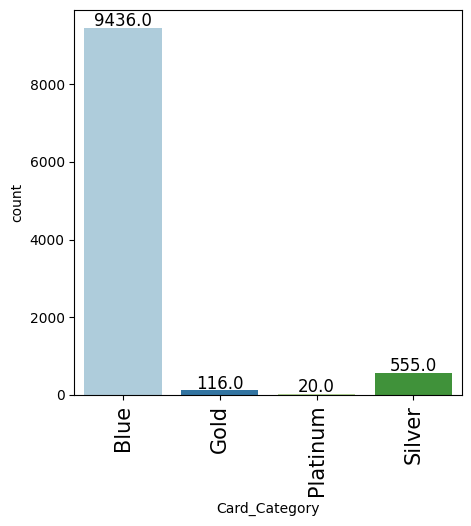

In [31]:
labeled_barplot(df, "Card_Category")

- There are 4 categories for the column "Card_Category". 93.2% of the clients are in blue category, 5.5% are Silver Category, 1.1% are gold category, and 0.2% are platinum category.

### Observations on Customer_Age (Numerical)

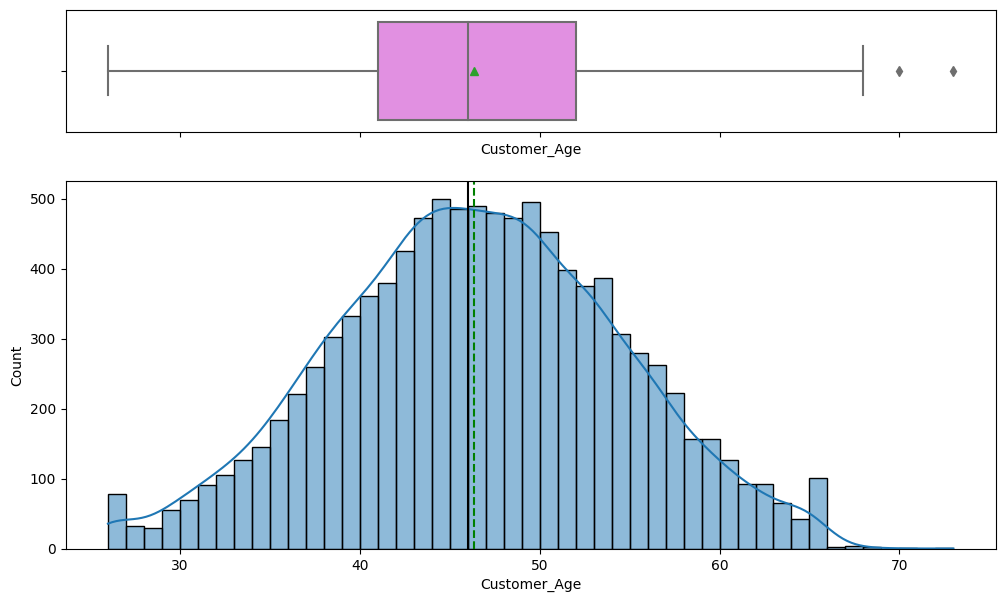

In [32]:
histogram_boxplot(df, "Customer_Age", kde=True)

In [33]:
outliers(df, "Customer_Age")

lower  24.5
upper  68.5


* Distribution of Customer_Age is normal.
* Age more than 68.5 is an outlier - there are no actions for this
- The minimum age of the customer is 26 years and the maximum 73. The mean is 46.3

Observations on Dependent_count (Numerical)

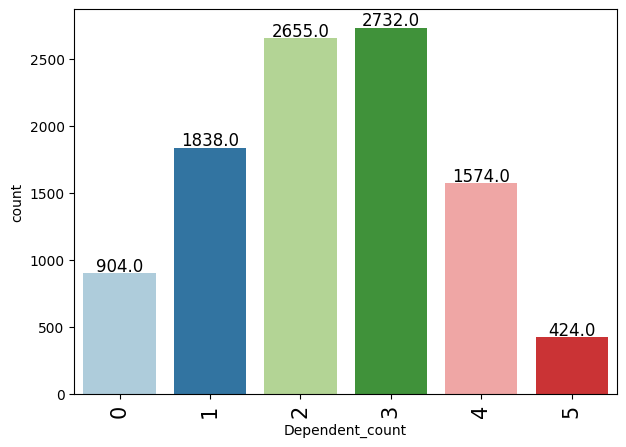

In [34]:
labeled_barplot(df, "Dependent_count")

* Number of dependents varies from 0 to 5. The mean is 2.3
* 27% of the custumers have 3 dependents
* 26.2% of the custumers have 2 dependents
* 18.1% of the custumers have 1 dependents
* 15.5% of the custumers have 4 dependents
* 8.92% of the custumers have 0 dependents
* 4.1% of the custumers have 5 dependents

### Observations on Months_on_book (Numerical)

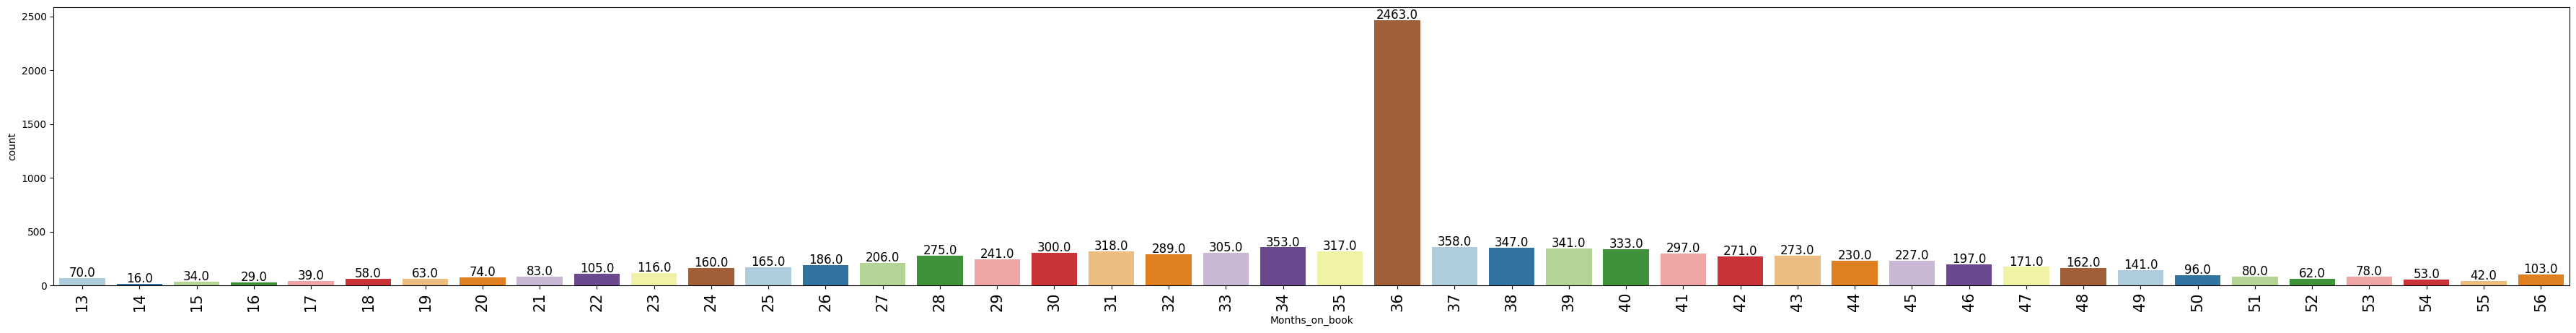

In [35]:
labeled_barplot(df, "Months_on_book")

* The minimum period of relationship with the bank is 13 months and the maximum 56 months.
* 24% of the custumers have been related with the bank for 36 months
* There is a central tendency

### Observations on Total_Relationship_Count (Numerical)

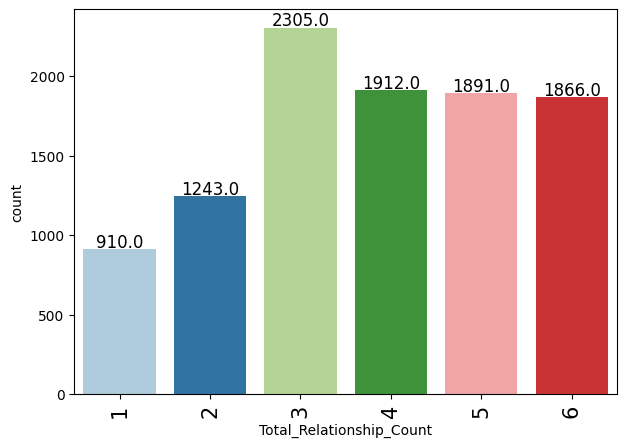

In [36]:
labeled_barplot(df, "Total_Relationship_Count")

* The minimum number of products held by the customers is 1 and the maximum 6. The mode is 3
* 78.7% of the clients have more than 3 producs
* Percentage of clients having 4, 5 and 6 products are similar (19% each)

### Observations on Months_Inactive_12_mon (Numerical)

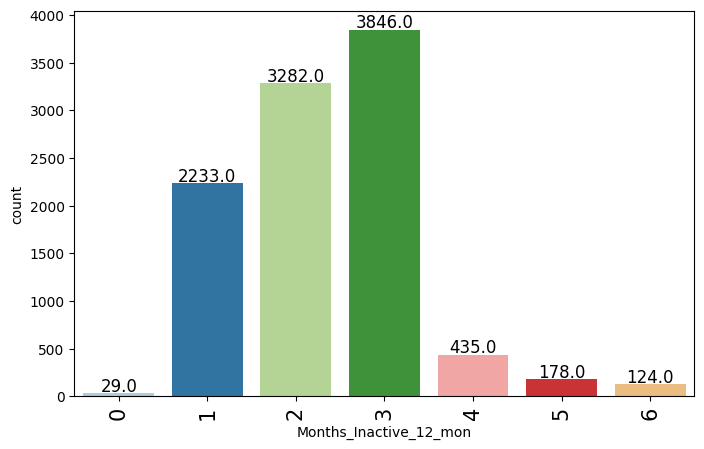

In [37]:
labeled_barplot(df, "Months_Inactive_12_mon")

* The minimum number of inactive months is 0 and the maximum is 6 months.
* There are 92.4% of clients that have been inactive between 1 to 3 months, but the percentage reduced significantly to 7.2% after 3 months.
* Only 0.3% of the clients remain active all the time

### Observations on Contacts_Count_12_mon (Numerical)

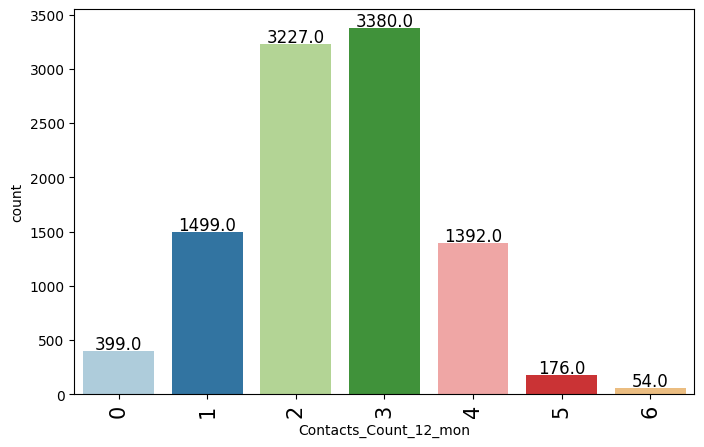

In [38]:
labeled_barplot(df, "Contacts_Count_12_mon")

* The minimum number of contacts count in the last 12 months is 0 and the maximum is 6 months.
* There are 33% of clients that have been contacted at least 3 times in the last 12 months.
* There are 31.9% of clients that have been contacted at least 2 times in the last 12 months.
* There are 15% of clients that have been contacted at least 1 time in the last 12 months.
* There are 13.7% of clients that have been contacted at least 4 times in the last 12 months.
* There are 3.9% of clients that have not been contacted in the last 12 months.
* There are 1.7% of clients that have been contacted at least 5 times in the last 12 months.
* There are 0.5% of clients that have been contacted at least 6 times in the last 12 months.
* In general 95% of the clients have been contacted between 1 to 4 times in the last 12 months.

### Observations on Credit_Limit (Numerical)

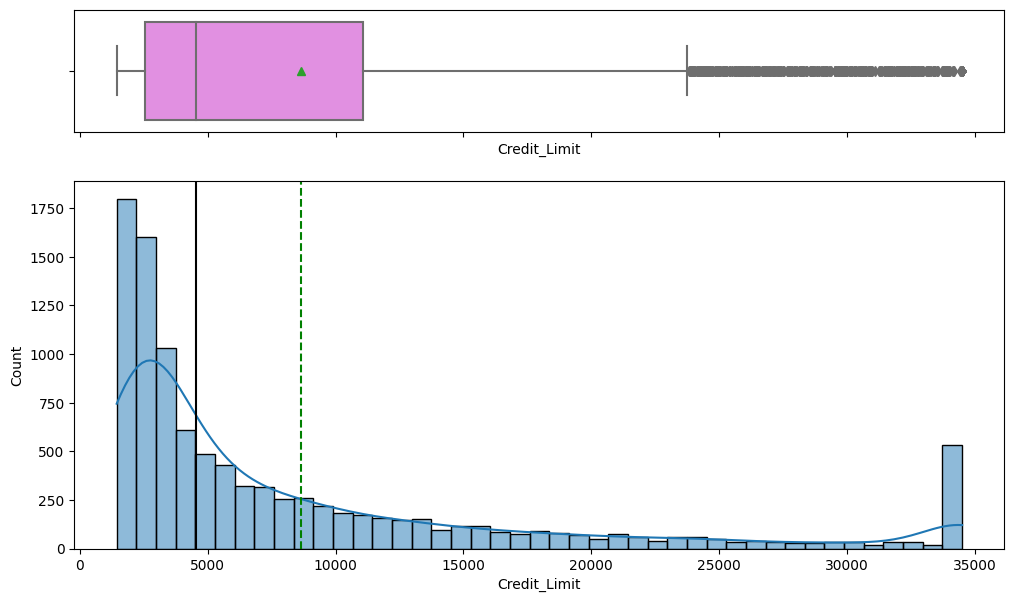

In [39]:
histogram_boxplot(df, "Credit_Limit", kde=True)

* The distribution of the credit limit is right-skewed.
* The boxplot shows that there are outliers at the right end
* These outliers are no going to be treated as they represent real data.


### Observations on Total_Revolving_Bal (Numerical)

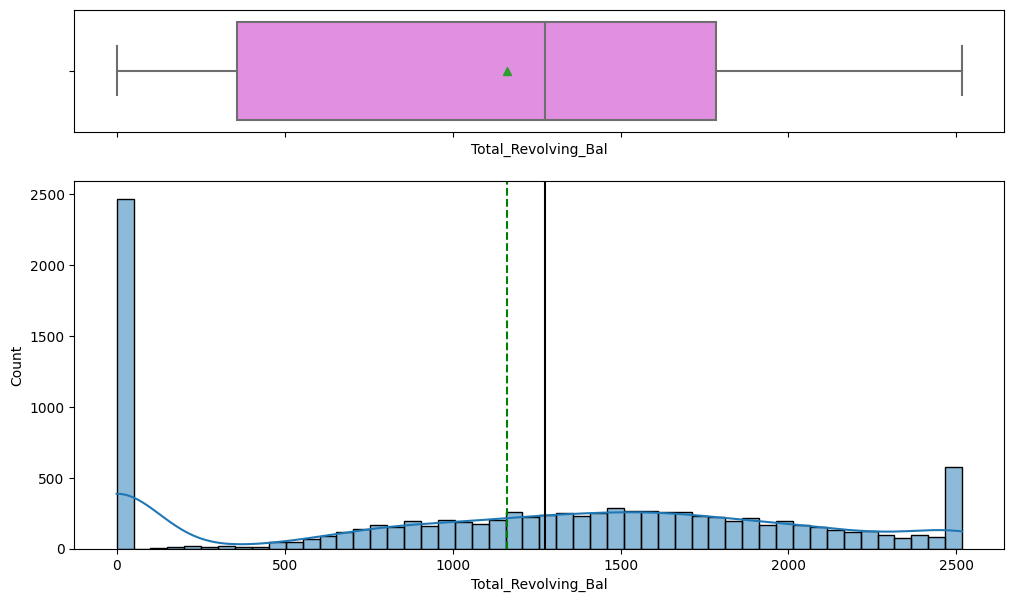

In [40]:
histogram_boxplot(df, "Total_Revolving_Bal", kde=True, bins=50)

* The distribution of the total revolving bal shows that the balance that carries over form one month to the next for the 25% of the clients is 0.
* For the 5% of the clients is 2500
* For the remianing varies mainly from 500 to 200.


### Observations on Avg_Open_To_Buy (Numerical)

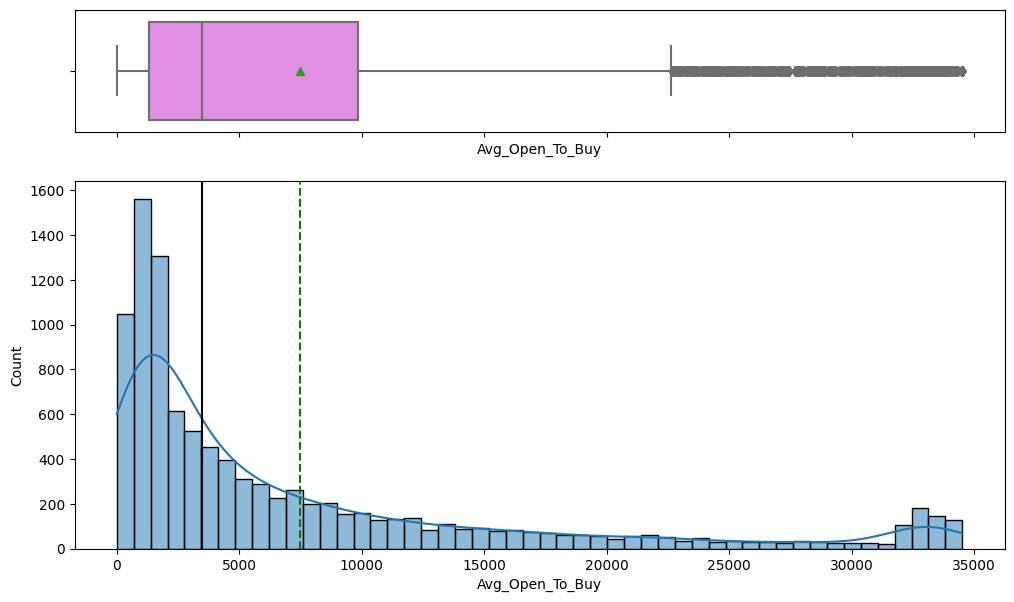

In [41]:
histogram_boxplot(df, "Avg_Open_To_Buy", kde=True, bins=50)

* The distribution of the Avg_Open_To_Buy is right-skewed.
* The boxplot shows that there are outliers at the right end
* These outliers are no going to be treated as they represent real data.

### Observations on Total_Amt_Chng_Q4_Q1 (Numerical)

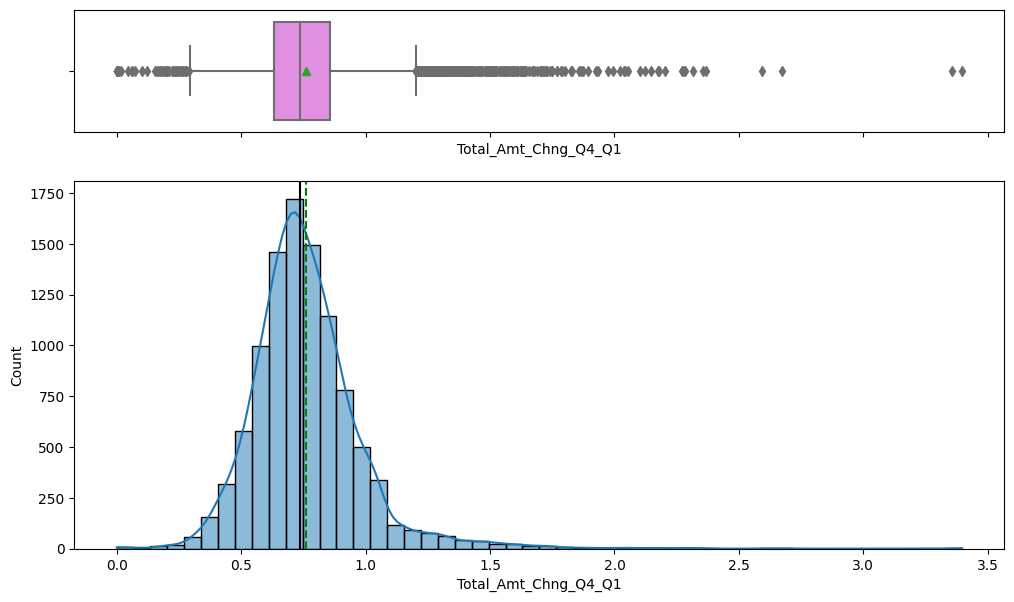

In [42]:
histogram_boxplot(df, "Total_Amt_Chng_Q4_Q1", kde=True, bins=50)

* The distribution of the Total_Amt_Chng_Q4_Q1 is right-skewed.
* The boxplot shows that there are outliers at the left and right end
* These outliers are no going to be treated as they represent real data.

### Observations on Total_Ct_Chng_Q4_Q1  (Numerical)

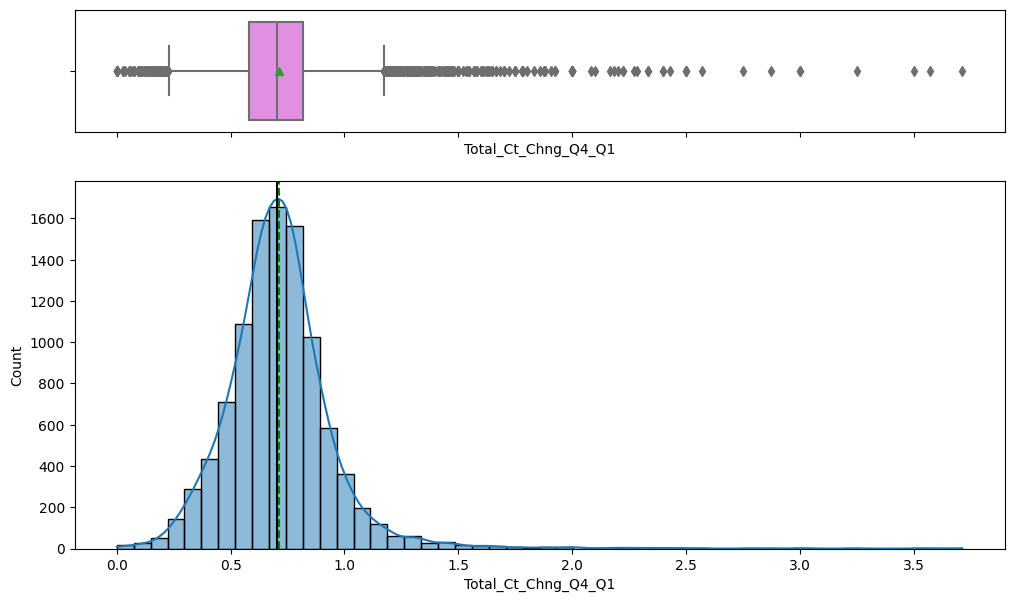

In [43]:
histogram_boxplot(df, "Total_Ct_Chng_Q4_Q1", kde=True, bins=50)

* Similar to the previous one

### Observations on Total_Trans_Amt  (Numerical)

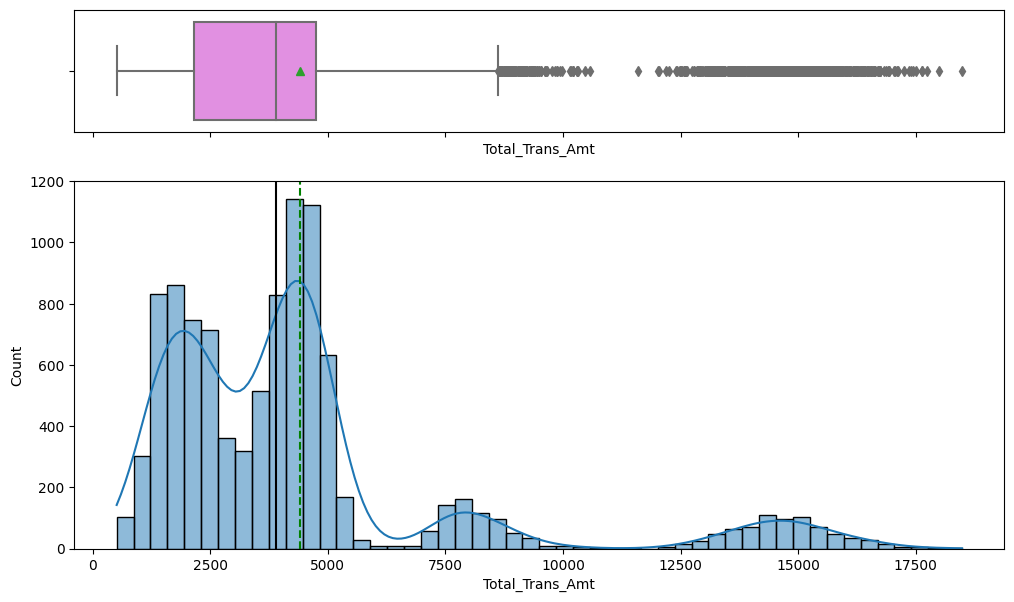

In [44]:
histogram_boxplot(df, "Total_Trans_Amt", kde=True, bins=50)

* The distribution of the Total Transaction amount is multimodal. There are 4 peaks in the distribution.
* There is a peak around 1300, another around 4400, another around 8000 and another around 15000
* The boxplot shows that there are outliers at the right end
* These outliers are no going to be treated as they represent real data.

### Observations on Total_Trans_Ct  (Numerical)

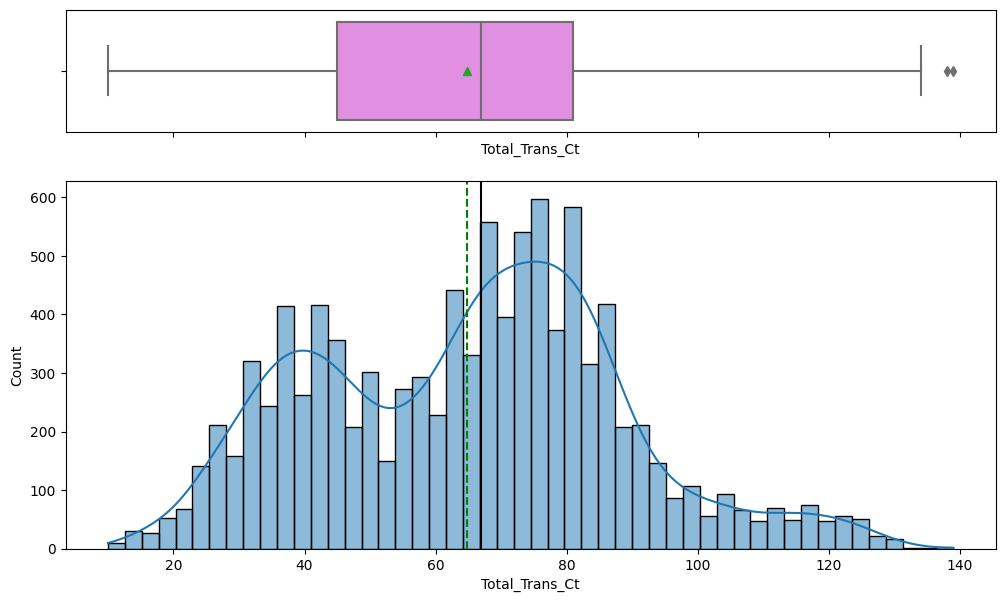

In [45]:
histogram_boxplot(df, "Total_Trans_Ct", kde=True, bins=50)

* The distribution of the TTotal_Trans_Ct is bimodal.
* The boxplot shows that there are outliers at the right end
* These outliers are no going to be treated as they represent real data.

### Observations on Avg_Utilization_Ratio   (Numerical)

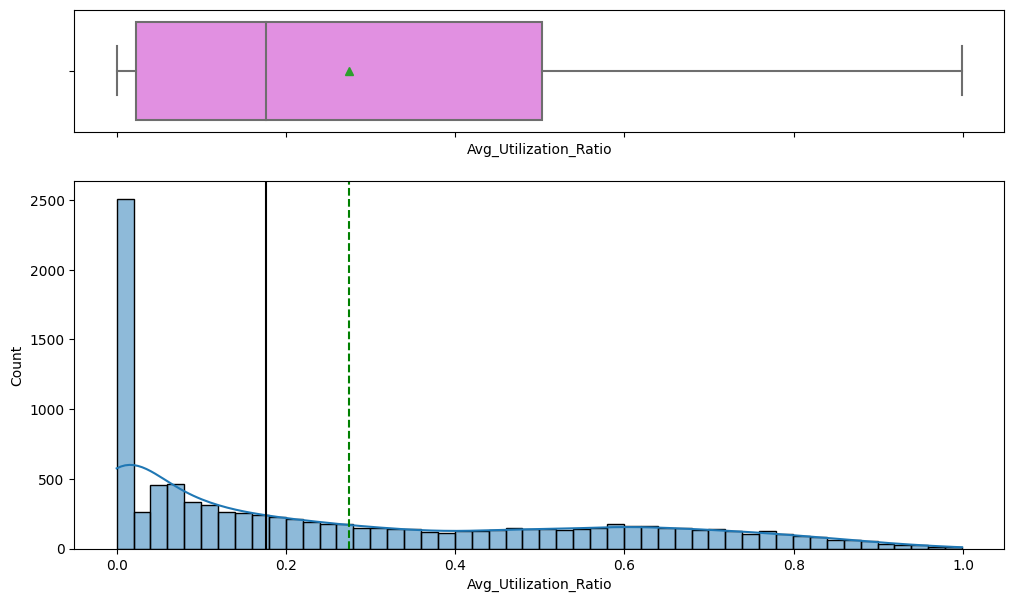

In [46]:
histogram_boxplot(df, "Avg_Utilization_Ratio", kde=True, bins=50)

* The distribution of the Avg_Utilization_Ratio is right-skewed.

### Bivariate Analysis

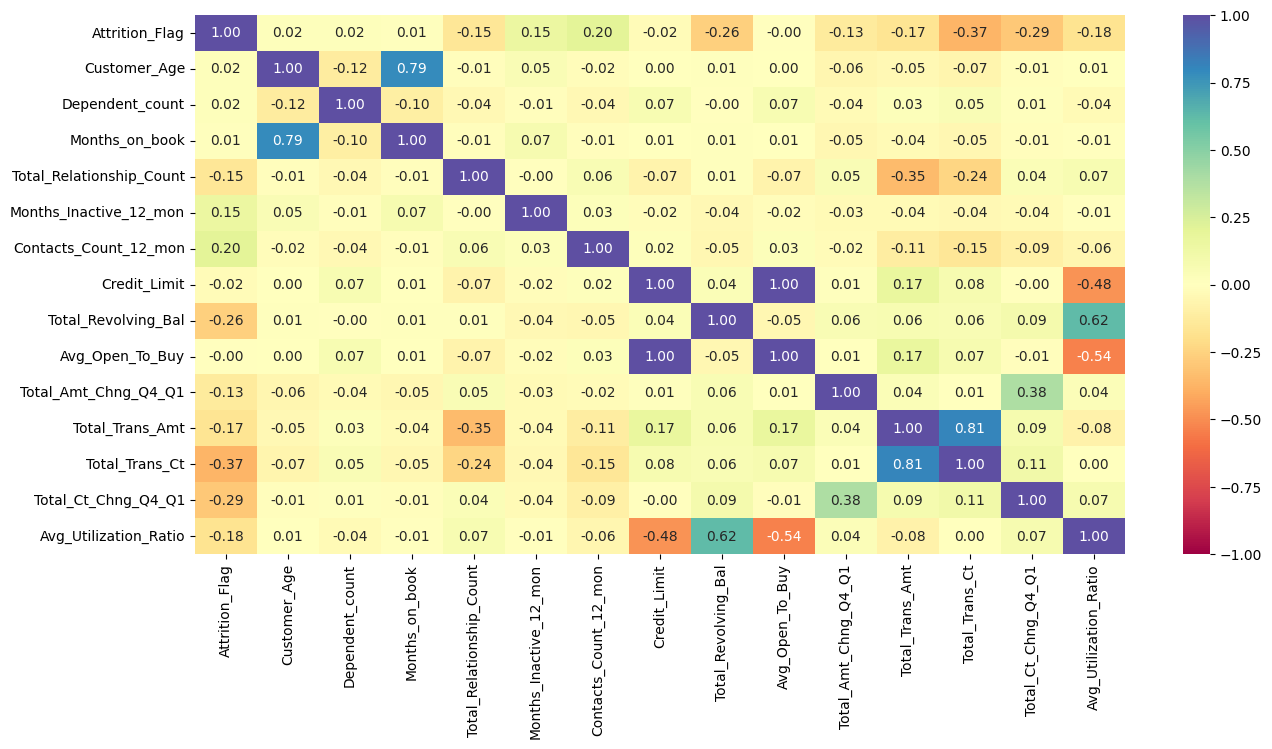

In [47]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no strong correlation either with the target or between any independent variable.
* Months_on:book has a strong positive correlation with Customer_age
* Total_Trans_CT has a strong correlation with Total_Trans_Amt

In [48]:
sns.pairplot(data=df, diag_kind="kde", hue="Attrition_Flag")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Bivariate Analysis**

* For most of the variables there is no strong correlation either with the Attrition_flag or between any independent variable.
* Seems that there is a correlation between Total transaction Count and Attrition Flag
* Seems that there is a correlation between Total transaction amount and Attrition Flag

**Attrition_Flag vs Customer_Age**

Attrition_Flag     0     1    All
Customer_Age                     
All             8500  1627  10127
43               388    85    473
48               387    85    472
44               416    84    500
46               408    82    490
45               407    79    486
49               416    79    495
47               403    76    479
41               303    76    379
50               381    71    452
54               238    69    307
40               297    64    361
42               364    62    426
53               328    59    387
52               318    58    376
51               340    58    398
55               228    51    279
39               285    48    333
38               256    47    303
56               219    43    262
59               117    40    157
37               223    37    260
57               190    33    223
58               133    24    157
36               197    24    221
35               163    21    184
33               107    20    127
34            

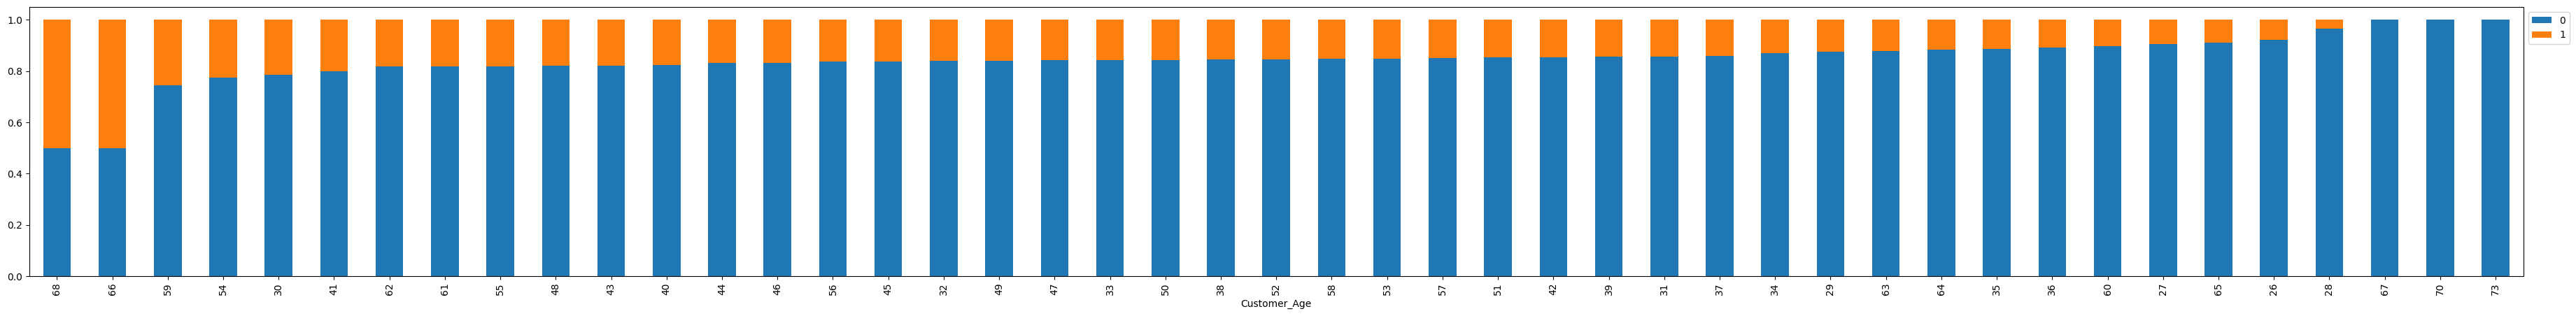

In [49]:
stacked_barplot(df, "Customer_Age", "Attrition_Flag")

* People in an age of 66 and 68 years old tend to attrite more than the people from other age
* There is not a correlation here

**Attrition_Flag vs Gender**

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


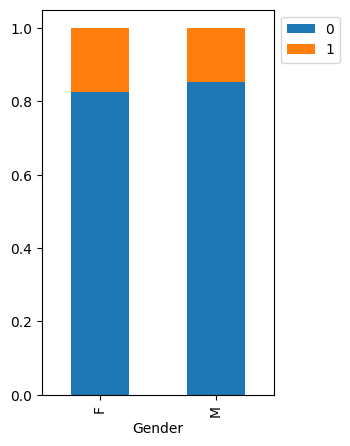

In [50]:
stacked_barplot(df, "Gender", "Attrition_Flag")

* Females tend to attrite more than men

**Attrition_Flag vs Dependent_count**

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


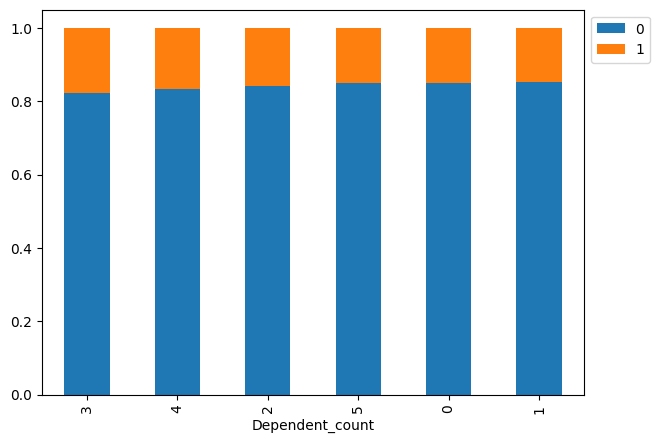

In [51]:
stacked_barplot(df, "Dependent_count", "Attrition_Flag")

* Seems that people with 3 dependents attrite more than the rest
* There is a simular distribution of attrition in all Dependent_count categories

**Attrition_Flag vs Education_Level**

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


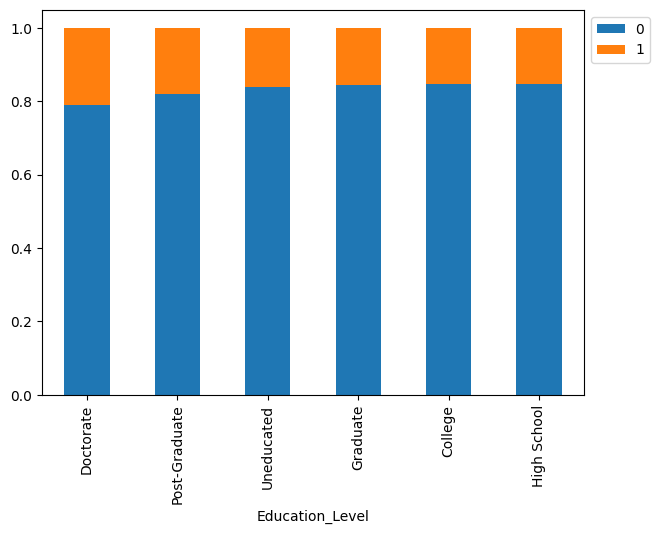

In [52]:
stacked_barplot(df, "Education_Level", "Attrition_Flag")

* Seems that people with Doctorate attrite more than the rest
* There is a simular distribution of attrition in all Education_Level categories

**Attrition_Flag vs Marital_Status**

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


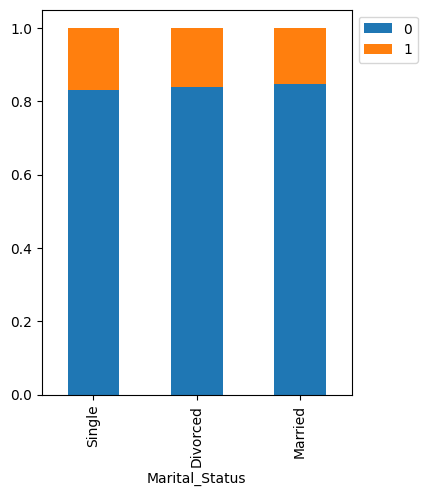

In [53]:
stacked_barplot(df, "Marital_Status", "Attrition_Flag")

* There is a simular distribution of attrition in all Marital_Status categories
* ~16% of the clients attrite in all Marital status

**Attrition_Flag vs Income_Category**

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


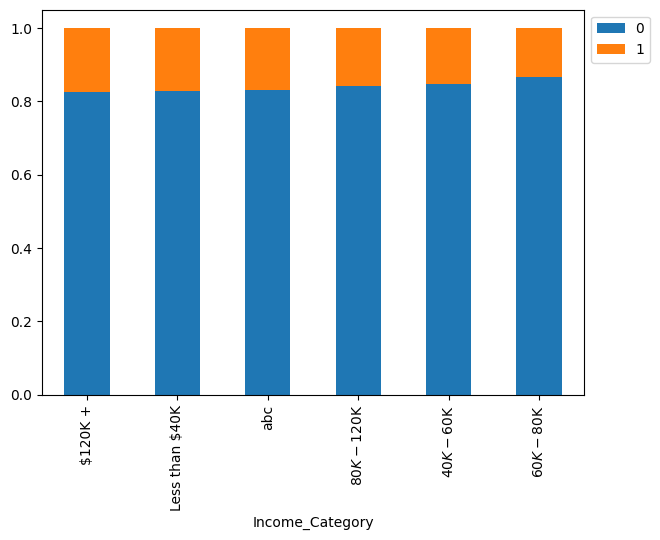

In [54]:
stacked_barplot(df, "Income_Category", "Attrition_Flag")

* There is a simular distribution of attrition in all Income_Catgory categories
* People with Income_Category >120K tend to attrite more than the others
* ~16% of the clients attrite in all Income_Catory

**Attrition_Flag vs Card_Category**

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


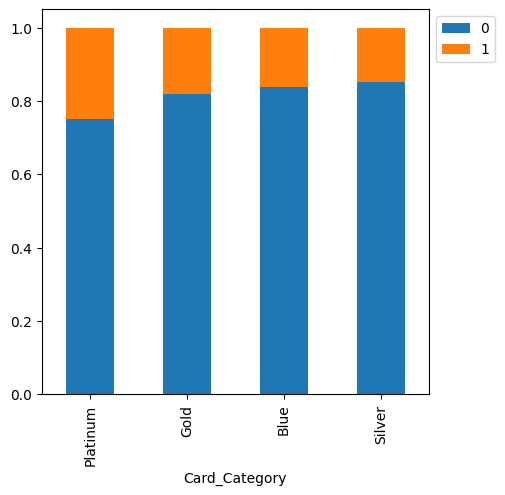

In [55]:
stacked_barplot(df, "Card_Category", "Attrition_Flag")

* Clients with Card_Category Platinum attrite more than the others. But this category only has 20 Clients.

**Attrition_Flag vs Months_on_book**

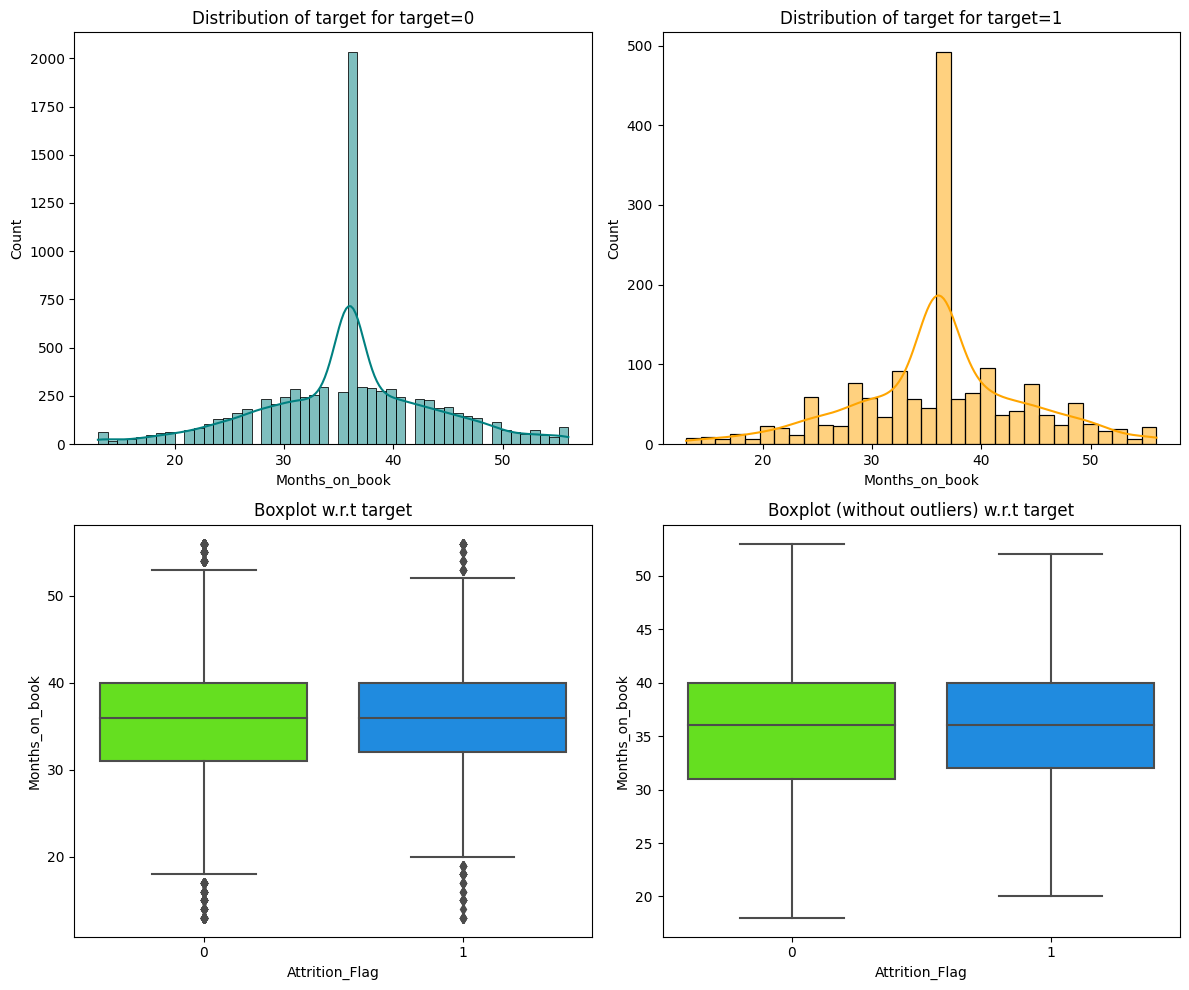

In [56]:
distribution_plot_wrt_target(df, "Months_on_book", "Attrition_Flag")

* Months on book don't seem to have any impact on the Attrition_Flag variable.

**Attrition_Flag vs Total_Relationship_Count**

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


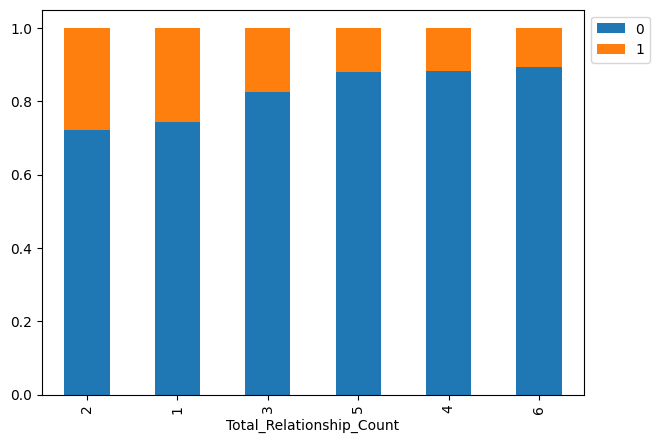

In [57]:
stacked_barplot(df, "Total_Relationship_Count", "Attrition_Flag")

* Clients with 1 or 2 products attrite more than the others
* ~26% of the clients with only 1 or 2 products attrite and close their accounts

**Attrition_Flag vs Months_Inactive_12_mon**

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


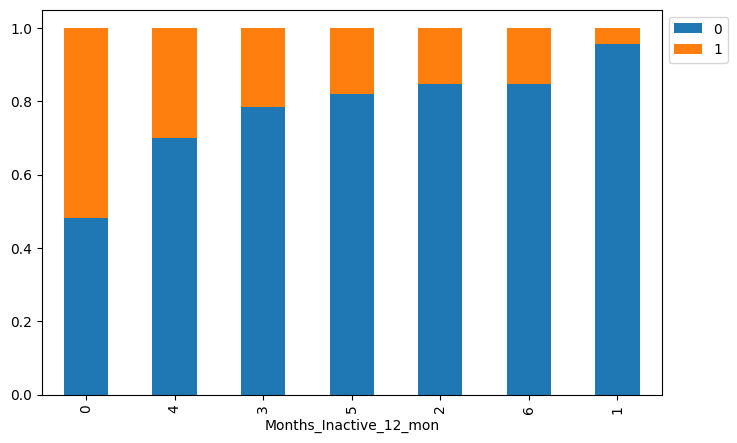

In [58]:
stacked_barplot(df, "Months_Inactive_12_mon", "Attrition_Flag")

* ~30% of the clients that have been inactive for 4 months attrite and close their accounts

**Attrition_Flag vs Contacts_Count_12_mon**

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


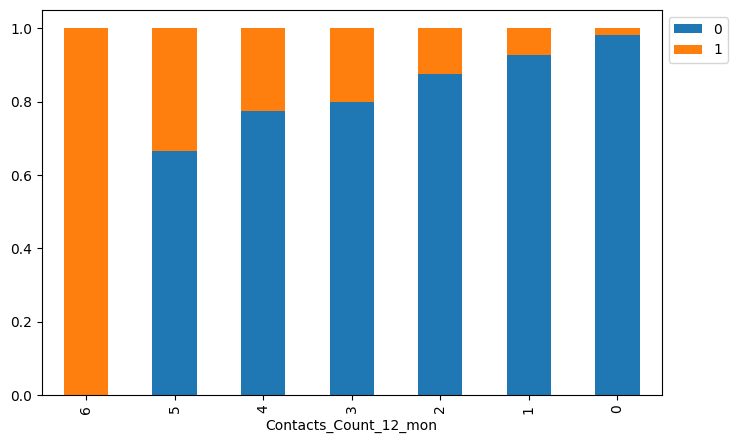

In [59]:
stacked_barplot(df, "Contacts_Count_12_mon", "Attrition_Flag")

* 100% of the customers that have 6 contacts with the bank attrite and close the account.
* With more number of contacts between customer and bank, more chance that the customer attrite and close the account.

**Attrition_Flag vs Credit_Limit**

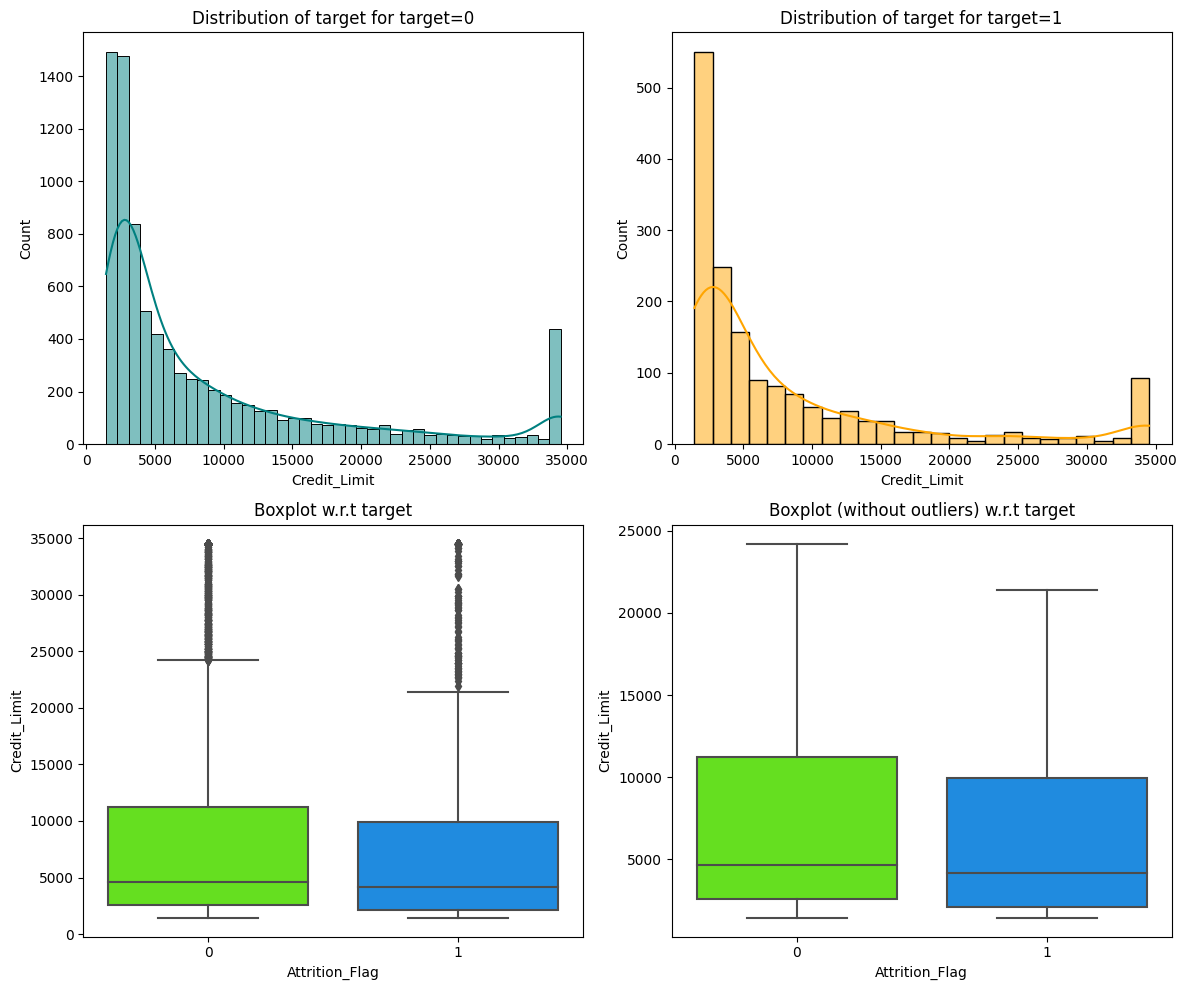

In [60]:
distribution_plot_wrt_target(df, "Credit_Limit", "Attrition_Flag")

* Credit Limits don't seem to have any impact on the Attrition_Flag variable.

**Attrition_Flag vs Total_Revolving_Bal**

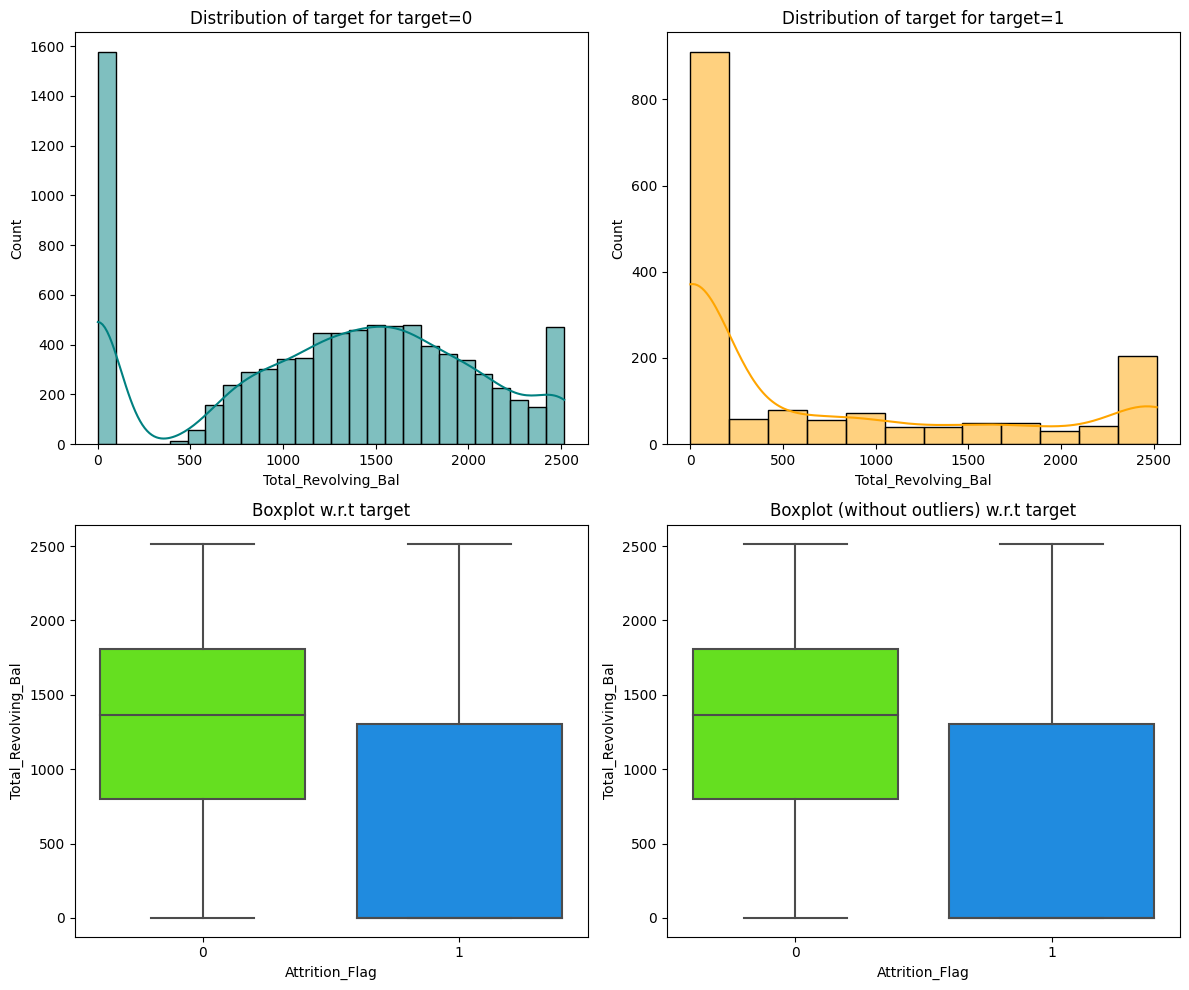

In [61]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

* Customers with low total revolving balance tends to attrite

**Attrition_Flag vs Avg_Open_To_Buy**

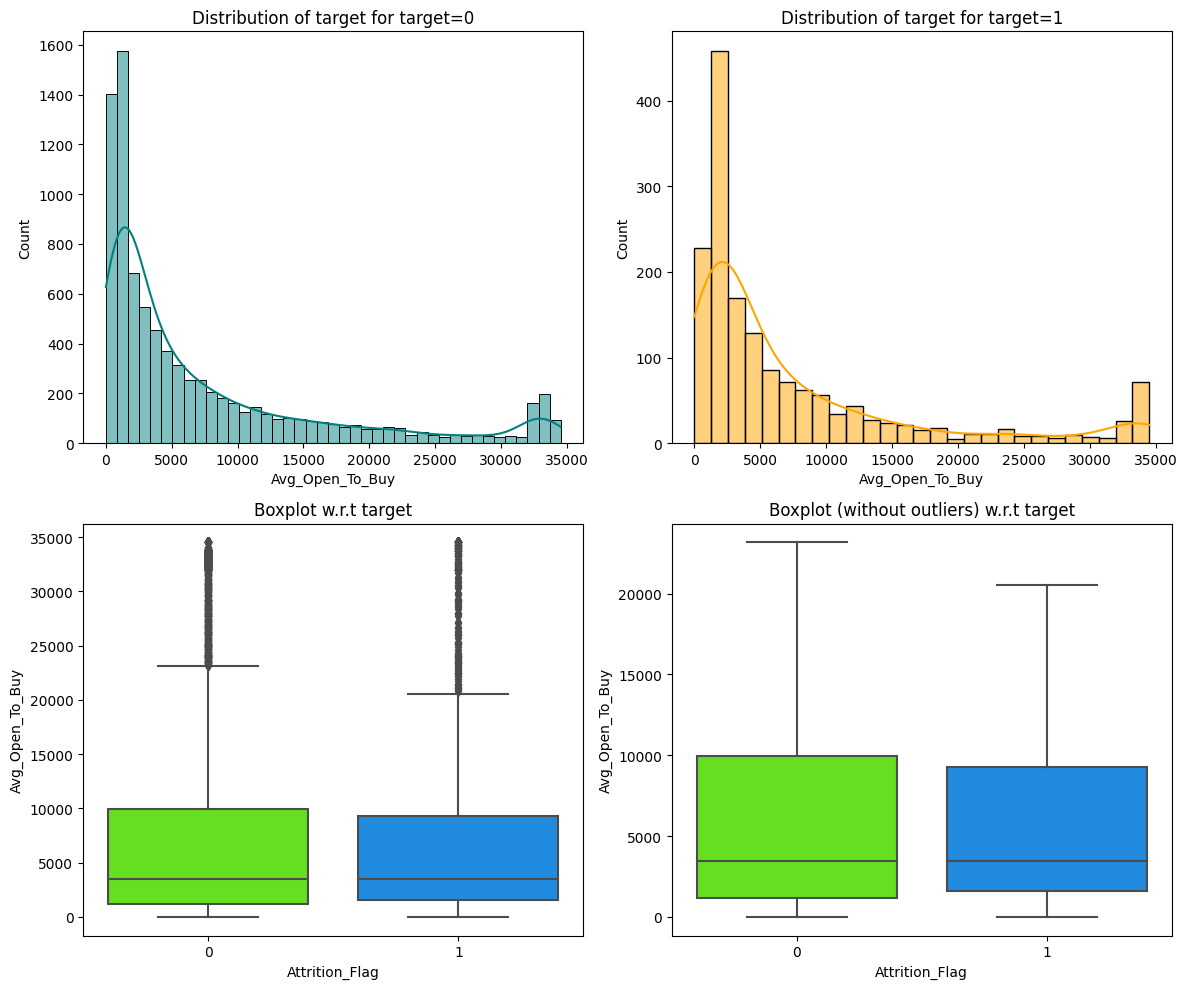

In [62]:
distribution_plot_wrt_target(df, "Avg_Open_To_Buy", "Attrition_Flag")

* Average open balance to buy does't see to have any impact on the Attrition_Flag variable.

**Attrition_Flag vs Total_Amt_Chng_Q4_Q1**

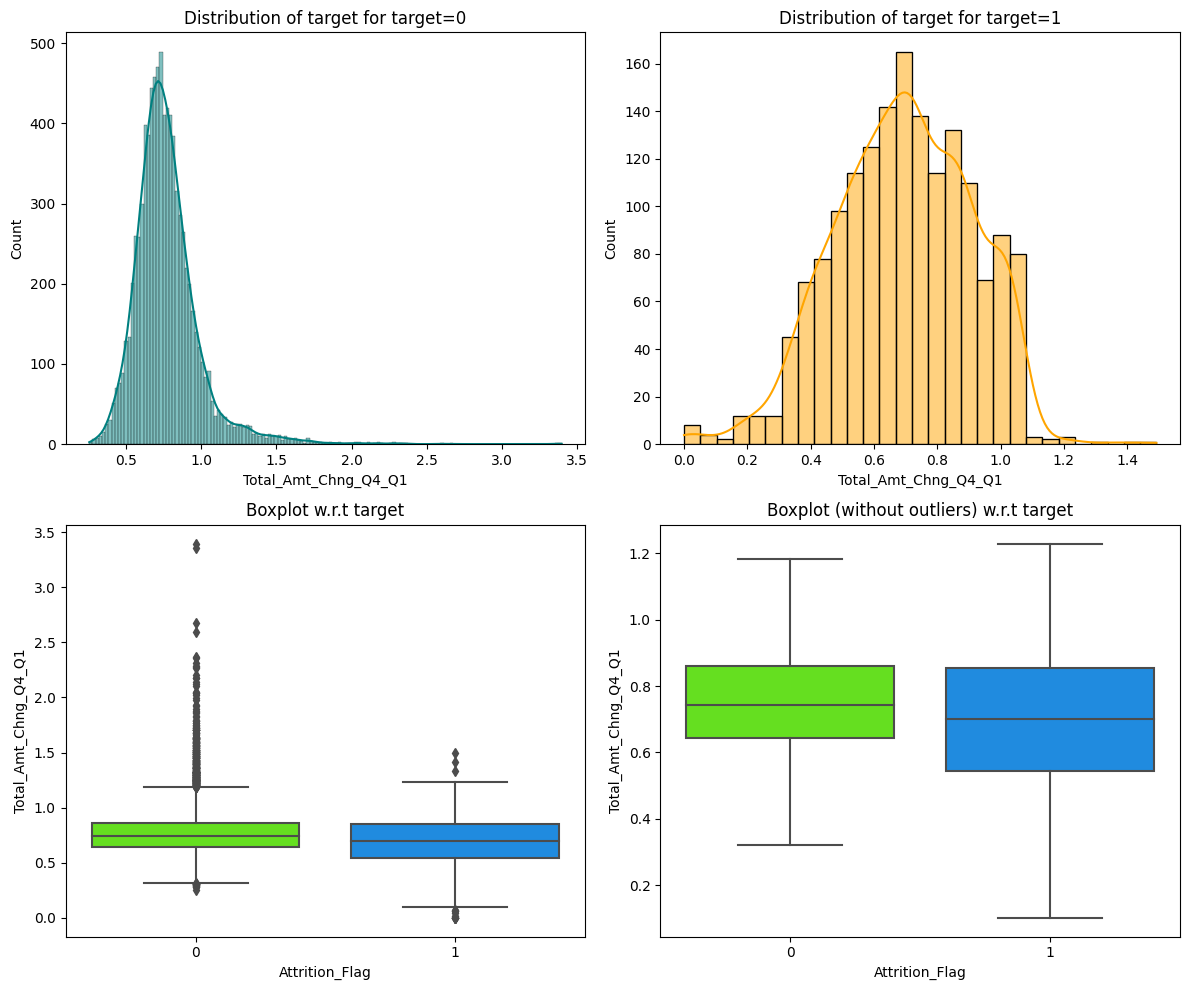

In [63]:
distribution_plot_wrt_target(df, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

* Customers with a ratio of the total transaction amoount in 4th quarter and 1st quarter more than 1.5 do not attrite.

**Attrition_Flag vs Total_Trans_Amt**

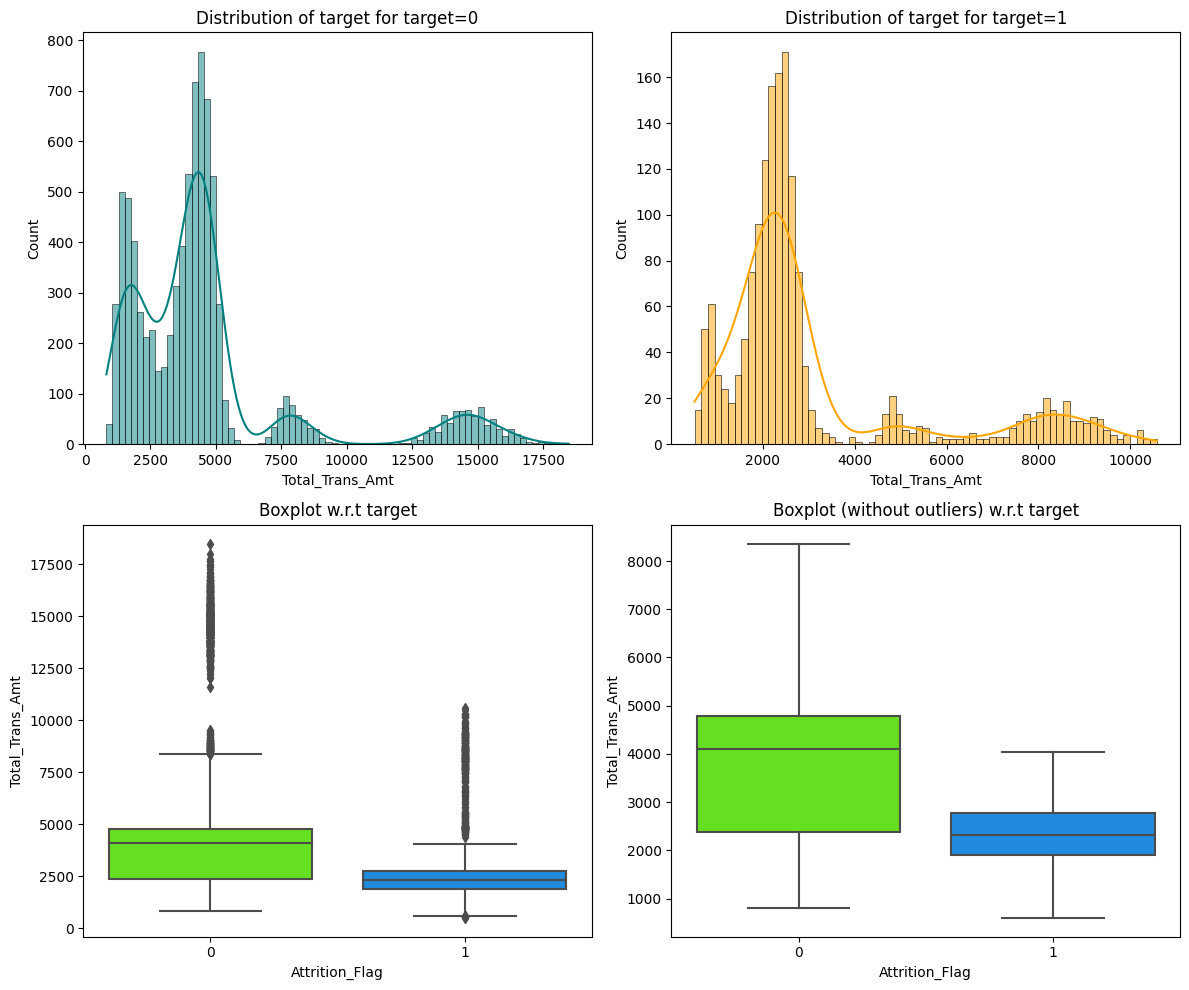

In [64]:
distribution_plot_wrt_target(df, "Total_Trans_Amt", "Attrition_Flag")

* Total transaction amount variable doesn't see to have any impact on the Attrition_Flag variable.

**Attrition_Flag vs Total_Trans_Ct**

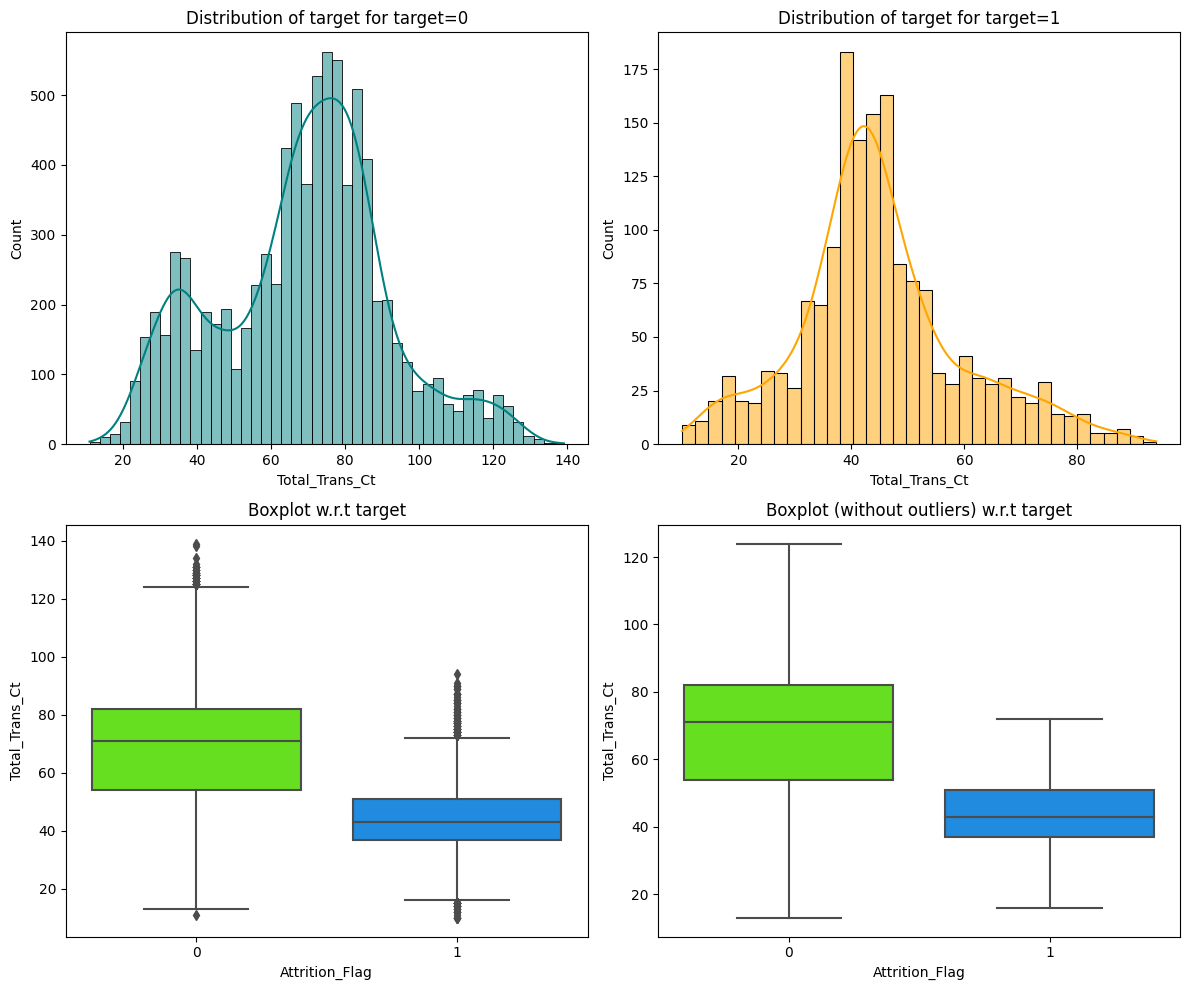

In [65]:
distribution_plot_wrt_target(df, "Total_Trans_Ct", "Attrition_Flag")

* For Total Transaction Count variable there's a stark difference between the customers who attrites and the ones who do not attrite.

**Attrition_Flag vs Total_Ct_Chng_Q4_Q1**

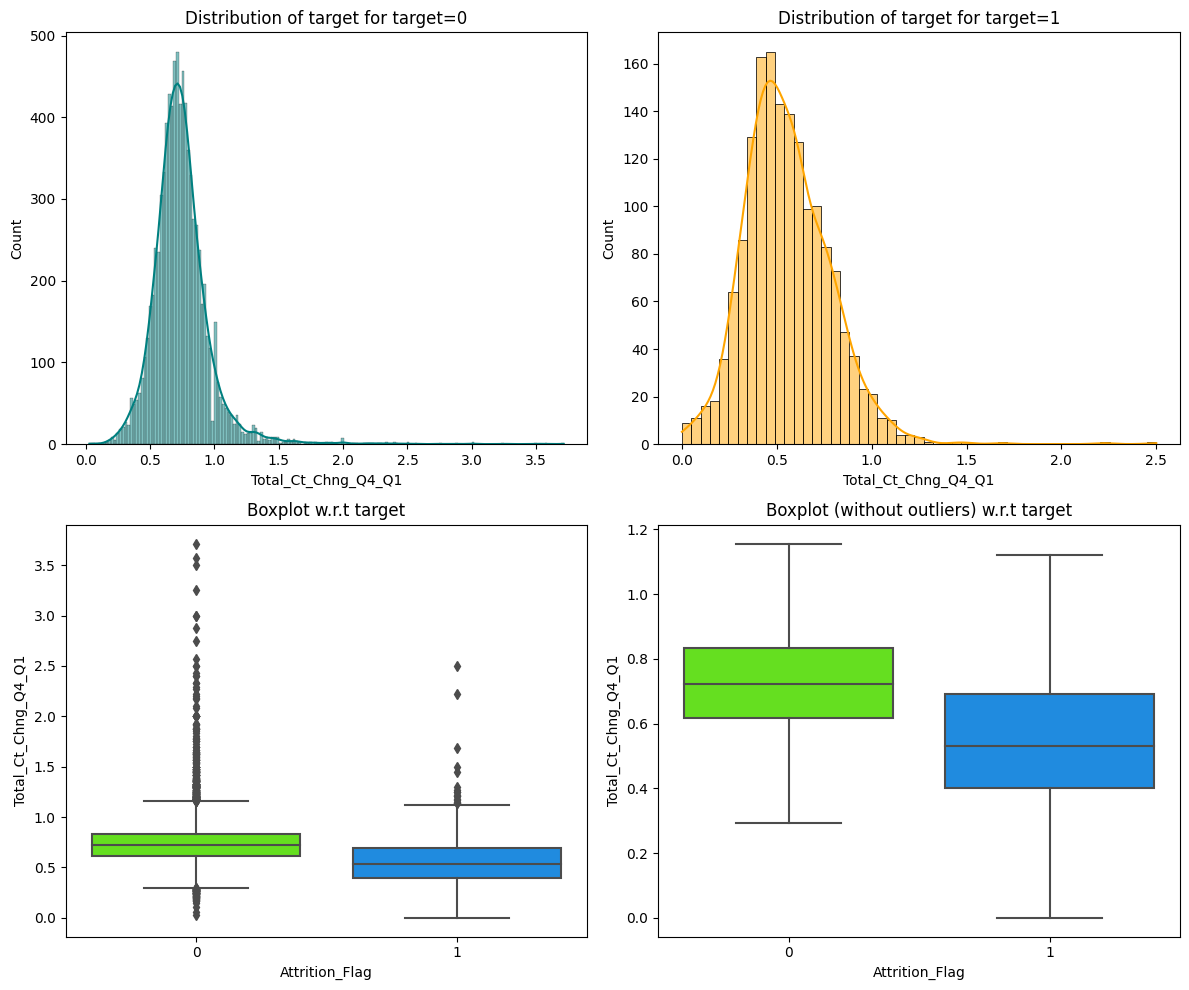

In [66]:
distribution_plot_wrt_target(df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

* Change in transaction amount between Q4 and Q1 variable doesn't see to have any impact on the customer's account status variable.

**Attrition_Flag vs Avg_Utilization_Ratio**

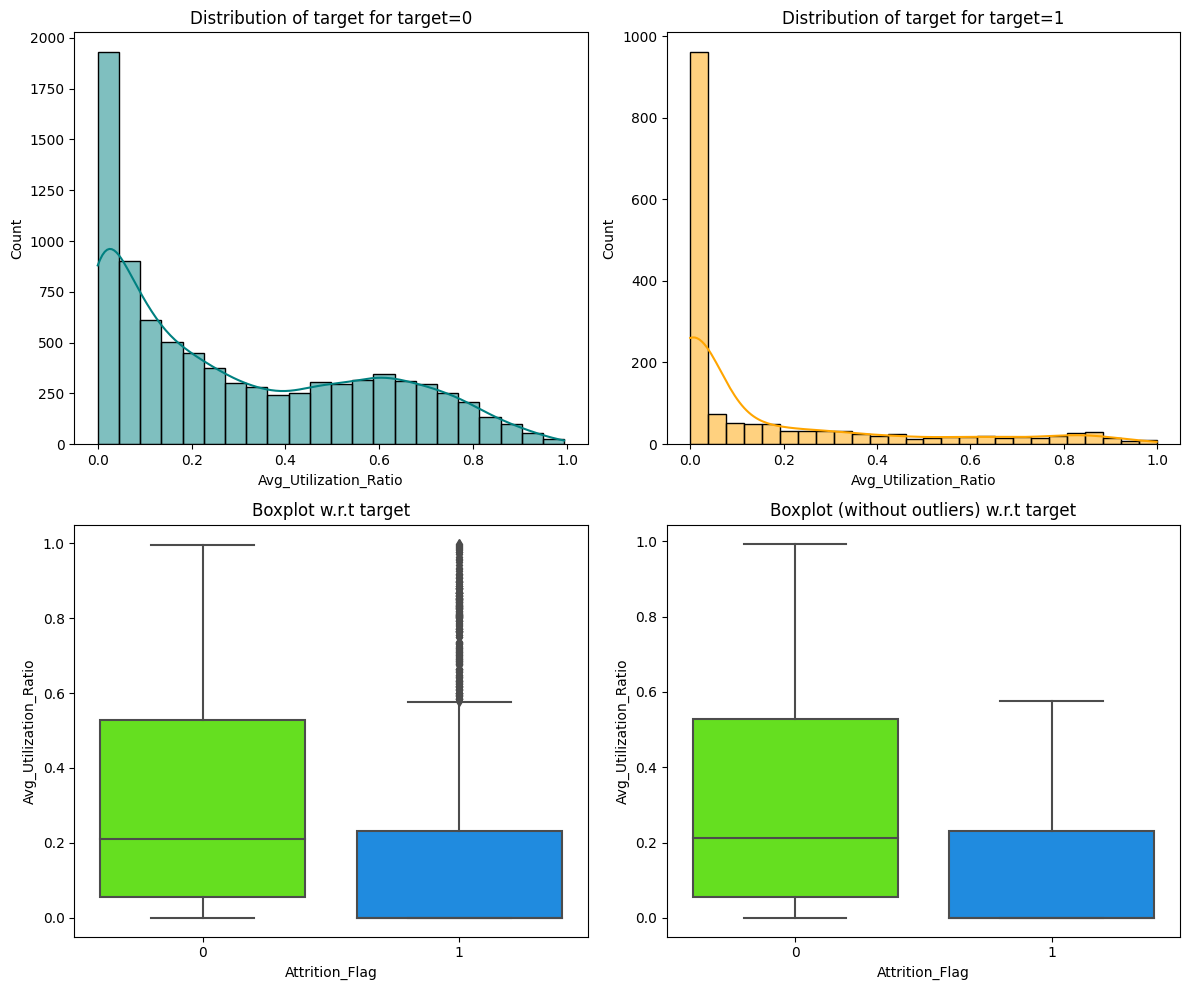

In [67]:
distribution_plot_wrt_target(df, "Avg_Utilization_Ratio", "Attrition_Flag")

* For Average Utilization Ratio variable there's a stark difference between the customers who attrites and the ones who do not attrite.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

- Clientnum is a unique ID, hence it is a variable that can be drop
- Customer_Age: The minimum age of the customer is 26 years and the maximum 73. The mean is 46.3
- Dependent_count: Number of dependents varies from 0 to 5. The mean is 2.3
- Months_on_book: The minimum period of relationship with the bank is 13 months and the maximum 56 months.
- Total_Relationship_Count: The minimum number of products held by the customers is 1 and the maximum 6. The mean is 3.8
- Months_Inactive_12_mon: The minimum number of inactive months is 0 and the maximum is 6 months.
- Contacts_Count_12_mon: Similar to the previous, the minimum number of contacts between client and bank is 0 and maximum 6.
- Credit_Limit: The credit limit in the credit cards varies from 1438 to 34516. the mean is 8632
- Total_Revolving_Bal: The balance that carries over from one month to the next varies from 0 to 2517 with a mean of 1162.8
- Avg_Open_To_Buy: The amount left in the card (average of the last 12 months)to use varies from 3 to 34516. The mean is 7469.
- Total_Amt_Chng_Q4_Q1: The ratio of the total transaction amount in 4th quarter and 1st quarter varies from 0 to 3.39. The mean is 0.76
- Total_Trans_Amt: The total transaction amount in the last 12 months varies from 510 to 18484. The mean is 4404.
- Total_Trans_Ct: The total transaction count in the last 12 months varies from 10 to 139. The mean is around 65.
- Total_Ct_Chng_Q4_Q1: The ratio of the transaction count in 4th quarter and 1st quarter varies from 0 to 3.71. The mean is 0.71
- Avg_Utilization_Ratio: The utilization ratio varies from 0 to 0.99. The mean is 0.275

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,10127.000,0.161,0.367,0.000,0.000,0.000,0.000,1.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


## Data Pre-processing

In [70]:
# creating the copy of the dataframe
df1 = df.copy()

**Replace atypical "abc" values in Income Category**

In [71]:
df1["Income_Category"].replace("abc", np.nan, inplace=True)

In [72]:
df1["Income_Category"].unique()

['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', NaN]
Categories (5, object): ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
                         'Less than $40K']

**Split the data in train, validation and test data**

In [73]:
X = df1.drop(["Attrition_Flag"], axis=1)
y = df1["Attrition_Flag"]

In [74]:
y.unique()

array([0, 1])

In [75]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [76]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


## Missing value imputation




In [77]:
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [78]:
# Get list of categorical and numerical columns
cat_cols = list(X_train.select_dtypes(include='category').columns)
num_cols = list(X_train.select_dtypes(include=['int', 'float']).columns)

# Impute categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# Impute numerical columns
num_imputer = SimpleImputer(strategy='mean')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

In [79]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

* All missing values have been treated.
* Let's inverse map the encoded values.

#### `Train Dataset`

In [80]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Married     3276
Single      2369
Divorced     430
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************


#### `Validation Dataset`

In [81]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1095
M     931
Name: Gender, dtype: int64
******************************
Graduate         917
High School      404
Uneducated       306
College          199
Post-Graduate    101
Doctorate         99
Name: Education_Level, dtype: int64
******************************
Married     1100
Single       770
Divorced     156
Name: Marital_Status, dtype: int64
******************************
Less than $40K    957
$40K - $60K       361
$80K - $120K      293
$60K - $80K       279
$120K +           136
Name: Income_Category, dtype: int64
******************************
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: Card_Category, dtype: int64
******************************


#### `Test Dataset`

In [82]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

F    1070
M     956
Name: Gender, dtype: int64
******************************
Graduate         948
High School      381
Uneducated       300
College          196
Post-Graduate    103
Doctorate         98
Name: Education_Level, dtype: int64
******************************
Married     1060
Single       804
Divorced     162
Name: Marital_Status, dtype: int64
******************************
Less than $40K    933
$40K - $60K       370
$60K - $80K       292
$80K - $120K      289
$120K +           142
Name: Income_Category, dtype: int64
******************************
Blue        1876
Silver       119
Gold          26
Platinum       5
Name: Card_Category, dtype: int64
******************************


### Creating Dummy Variables

In [83]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


* After encoding there are 29 columns.

In [84]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
800,40.000,2.000,21.000,6.000,4.000,3.000,20056.000,1602.000,18454.000,0.466,1687.000,46.000,0.533,0.080,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
498,44.000,1.000,34.000,6.000,2.000,0.000,2885.000,1895.000,990.000,0.387,1366.000,31.000,0.632,0.657,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4356,48.000,4.000,36.000,5.000,1.000,2.000,6798.000,2517.000,4281.000,0.873,4327.000,79.000,0.881,0.370,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
407,41.000,2.000,36.000,6.000,2.000,0.000,27000.000,0.000,27000.000,0.610,1209.000,39.000,0.300,0.000,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1
8728,46.000,4.000,36.000,2.000,2.000,3.000,15034.000,1356.000,13678.000,0.754,7737.000,84.000,0.750,0.090,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1


## Model Building

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer will close the account and the customer doesn't close the account
2. Predicting a customer will not close the account and the customer close the account

### Which case is more important?
* Predicting that customer will not close the account (not attrite) but he close the account (attries) i.e. losing on a valuable customer.

### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the company can provide incentives to control attrition rate especially for top-performers thereby optimizing the overall project cost in retaining the best talent.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [85]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

Sample code for model building with original data

In [86]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.985655737704918
Random forest: 1.0
GBM: 0.875
Adaboost: 0.826844262295082
dtree: 1.0

Validation Performance:

Bagging: 0.8128834355828221
Random forest: 0.7975460122699386
GBM: 0.8558282208588958
Adaboost: 0.852760736196319
dtree: 0.7944785276073619


- GBM has the best performance on validation followed by Adaboost

### Model Building with Oversampled data


In [87]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 



In [88]:
print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



In [89]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9978427142576975
Random forest: 1.0
GBM: 0.9825455971759168
Adaboost: 0.9715630515787409
dtree: 1.0

Validation Performance:

Bagging: 0.8496932515337423
Random forest: 0.8220858895705522
GBM: 0.8865030674846626
Adaboost: 0.8711656441717791
dtree: 0.843558282208589


In [90]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9978, Validation Score: 0.8497, Difference: 0.1481
Random forest: Training Score: 1.0000, Validation Score: 0.8221, Difference: 0.1779
GBM: Training Score: 0.9825, Validation Score: 0.8865, Difference: 0.0960
Adaboost: Training Score: 0.9716, Validation Score: 0.8712, Difference: 0.1004
dtree: Training Score: 1.0000, Validation Score: 0.8436, Difference: 0.1564


- GBM has the best performance on validation followed by Adaboost

### Model Building with Undersampled data

In [91]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [92]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



In [93]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9907786885245902
Random forest: 1.0
GBM: 0.9805327868852459
Adaboost: 0.9528688524590164
dtree: 1.0

Validation Performance:

Bagging: 0.9294478527607362
Random forest: 0.9386503067484663
GBM: 0.9570552147239264
Adaboost: 0.9601226993865031
dtree: 0.9202453987730062


In [94]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9908, Validation Score: 0.9294, Difference: 0.0613
Random forest: Training Score: 1.0000, Validation Score: 0.9387, Difference: 0.0613
GBM: Training Score: 0.9805, Validation Score: 0.9571, Difference: 0.0235
Adaboost: Training Score: 0.9529, Validation Score: 0.9601, Difference: -0.0073
dtree: Training Score: 1.0000, Validation Score: 0.9202, Difference: 0.0798


- Adaboost has the best performance followed by GBM model as per the validation performance

- After building 15 models, it was observed that both the GBM and Adaboost models, trained on an undersampled dataset, as well as the GBM model trained on an oversampled dataset, exhibited strong performance on both the training and validation datasets.
- Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance
- We will tune these 3 models using the same data (undersampled or oversampled) as we trained them on before

### HyperparameterTuning

#### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}
```

### Tuning  Gradient Boosting model with Undersampled Data

In [95]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid,
                                   n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9559340659340659:
CPU times: user 1.64 s, sys: 172 ms, total: 1.82 s
Wall time: 1min 14s


In [96]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [97]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.996,0.999,0.994,0.996


In [98]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.944,0.957,0.759,0.847


#### Tuning Adaboosting model with Undersampled Data

In [99]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

KeyboardInterrupt: ignored

In [ ]:
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb1.fit(X_train_un, y_train_un)

In [ ]:
# Checking model's performance on training set
adb1_train = model_performance_classification_sklearn(tuned_adb1, X_train_un, y_train_un)
adb1_train

In [ ]:
# Checking model's performance on validation set
adb1_val = model_performance_classification_sklearn(tuned_adb1, X_val, y_val)
adb1_val

### Tuning  Gradient Boosting model with Oversampled Data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid,
                                   n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=1,
    n_estimators=75,
    max_features=0.7,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

In [ ]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(
    tuned_gbm2, X_train_over, y_train_over
)
gbm2_train

In [ ]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

In [ ]:
#XGBoost
from sklearn.metrics import classification_report

# create model instance
bst = XGBClassifier(max_depth=3,scale_pos_weight=3)
# fit model
bst.fit(X_train.values, y_train)
# make predictions
preds = bst.predict(X_test.values)

In [ ]:
print(classification_report(y_train,bst.predict(X_train)))

In [ ]:
print(classification_report(y_test,preds))

In [ ]:
y_train.value_counts()

In [ ]:
5099/979

In [ ]:
feature_names = X_train.columns
importances = bst.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb1_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, adb1_val.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

- AdaBoost model trained with undersampled data has generalised performance, so let's consider it as the best model.

### Test set final performance

In [ ]:
# Let's check the performance on test set
ada_test = model_performance_classification_sklearn(tuned_adb1, X_test, y_test)
ada_test

- The Adaboost model trained on undersampled data has given ~97% recall on the test set
- This performance is in line with what we achieved with this model on the train and validation sets
- So, this is a generalized model

In [ ]:
feature_names = X_train.columns
importances = tuned_adb1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total Transaction amount, Total Transaction Count, Ratio of the total transaction  amount in Q4 and Q1(Total_Amt_Chng_Q4_Q1), and the balance that carries over from one month to the next (Total_Revolving_Bal) are the most important features for making predictions

# Business Insights and Conclusions


* Special attention shall be given to the transaction amount and transaction count of the customers. Customers with a transaction amount of less than 10,000 or fewer than 80 transactions are the ones that can close their accounts.
* Another important aspect to be considered together with the previous ones is the total amount change between Q4 and Q1. It seems that a ratio less than 1 is an indication of possible attrition.
* Another important aspect to be considered together with the previous ones is the balance that carries over from one month to the next. It seems that customers with a total revolving balance of less than 500 will attrite.
* The bank shall consider contacting the customers that meet the previous characteristics with retention policies such as:
  * Attractive Rewards Programs
  * Competitive Interest rates
  * Exclusive Offers and Discounts
  * Quality Customer Service
  * Flexible Payments Methods
  * Incentives for Continued Use